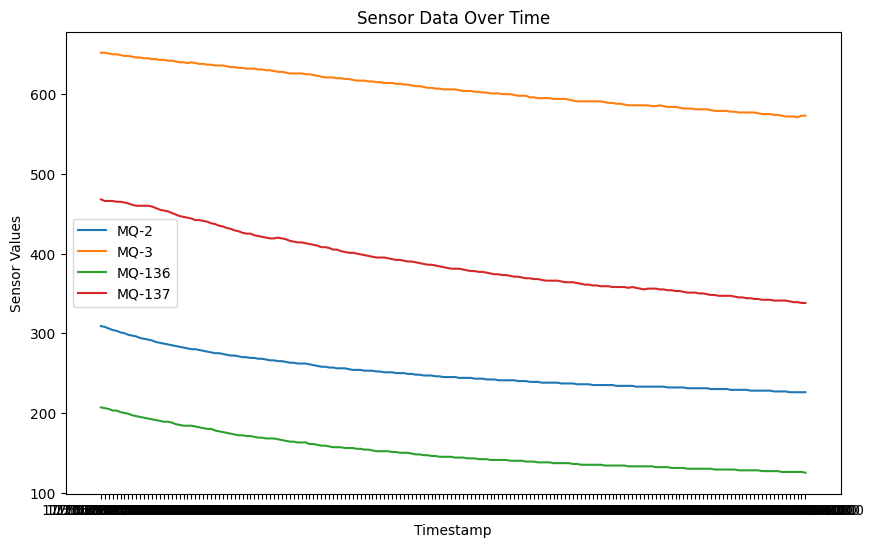

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Replace this with the actual path to your text file
file_path = "11.17그냥 대기 측정.txt"

# Read the file, skipping the first two lines and excluding the last line
data_str = open(file_path).readlines()[2:-1]

# Extracting data
timestamps = []
sensor_data = []

for line in data_str:
    parts = line.split(' -> ')
    timestamp, values = parts[0].strip(), parts[1].strip().split(',')
    timestamps.append(timestamp)
    sensor_data.append(values)

# Create a DataFrame
data_df = pd.DataFrame(sensor_data)

data_df['Timestamp'] = timestamps
column_mapping = {1: 'MQ-2', 2: 'MQ-3', 3: 'MQ-136', 4: 'MQ-137'}
data_df = data_df.rename(columns=column_mapping)

# Convert the Timestamp column to datetime
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format='%H:%M:%S.%f').dt.time

# Reorder the columns
column_order = columns + ['Timestamp']
data_df = data_df[column_order]

# Plotting
plt.figure(figsize=(10, 6))
for col in columns:  # Exclude the Timestamp column
    plt.plot(data_df['Timestamp'].astype(str), data_df[col].astype(float), label=col)

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.title('Sensor Data Over Time')

# Show legend
plt.legend()

# Show the plot
plt.show()
